<a href="https://colab.research.google.com/github/Lubna904/Classify-fetal-health-in-order-to-prevent-child-and-maternal-mortality/blob/main/Lubna_40239904_6220_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obesity Classification using Principal Component Analysis

Installing Pycaret

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.5 MB/s et

Import Libraries

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import shap
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


# Dataset:
The "Obesity Classification Dataset" used for Principal Component Analysis (PCA) and classification models were obtained from Kaggle. The data set provides information about health factors considered for weight calculation. A total of 763 data have been extracted from various sources such as medical records, surveys, and self-reported data. The data attributes are explained below:

1.  ID: A unique identifier for each individual
2.  Age: The age of the individual
3.  Gender: The gender of the individual
4. Height: The height of the individual in centimetres
5. Weight: The weight of the individual in kilograms
6. BMI: The body mass index of the individual, calculated as weight divided by height squared
7. Label: The obesity classification of the individual, which can be one of the following: Normal Weight, Overweight, Obese, Underweight


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Load data from drive
df = pd.read_csv('/content/drive/My Drive/Obesity_Classification.csv')

df.head(100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
95,98,22,Male,180,20,8.3,Underweight
96,99,27,Female,150,20,8.3,Underweight
97,100,32,Male,190,25,10.0,Underweight
98,101,37,Female,140,25,10.0,Underweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


Dataset Cleanup

In [ ]:
columns_to_drop = ['ID', 'Gender']

df = df.drop(columns=columns_to_drop)

In [ ]:
df = df.drop_duplicates()

print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Data Analysis

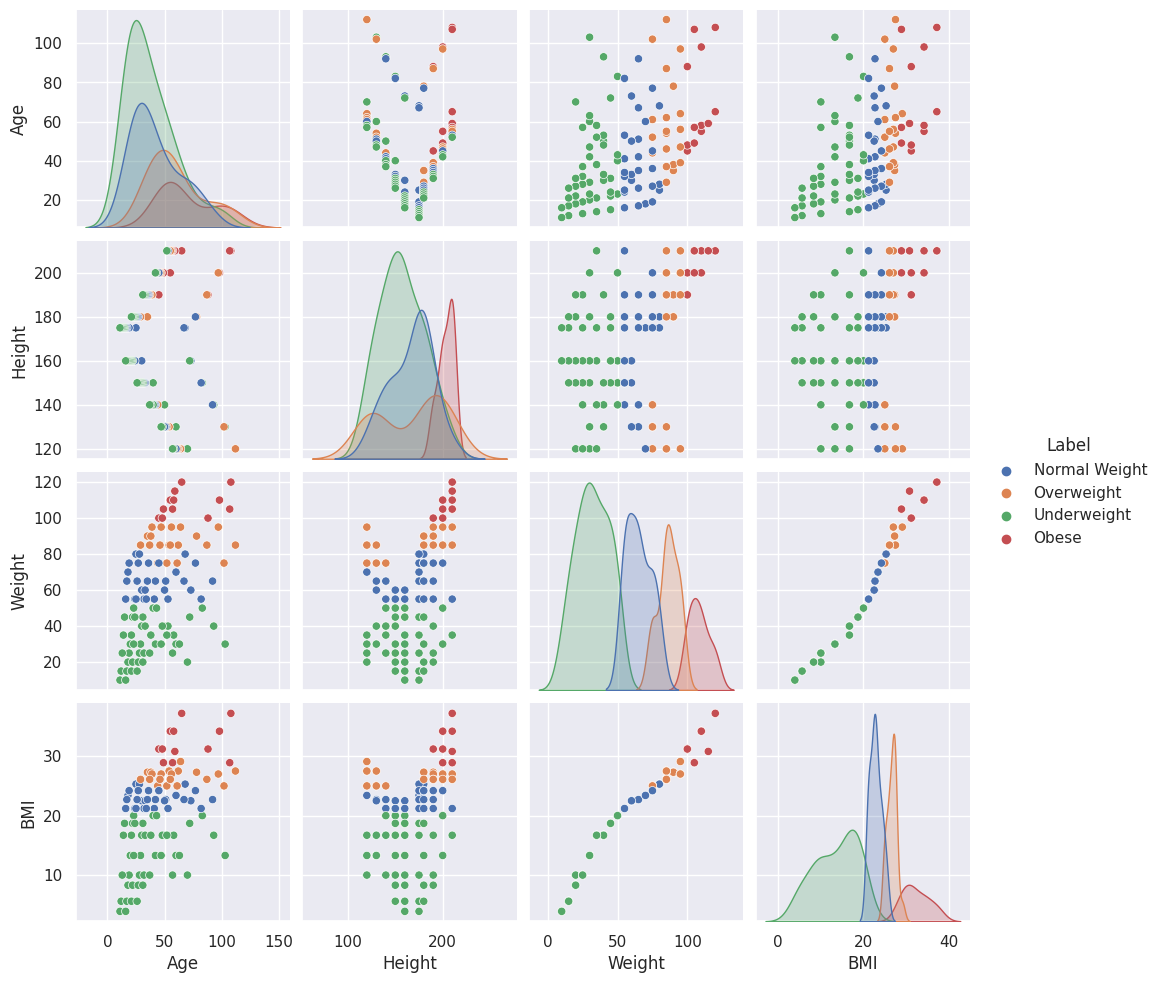

In [ ]:
sns.pairplot(df, hue='Label')
plt.show()

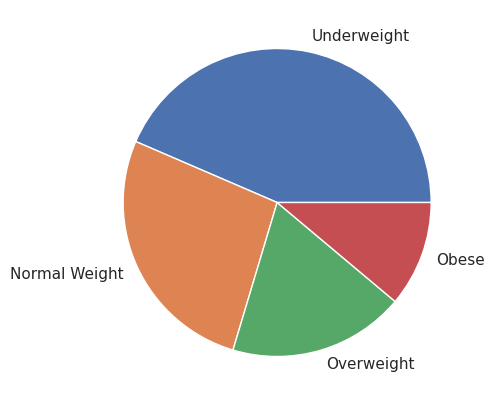

In [ ]:
y =df['Label']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [ ]:
X = df.drop(columns=['Label'])
X.head(100)

,Age,Height,Weight,BMI
0,25,175,80,25.3
1,30,160,60,22.5
2,35,180,90,27.3
3,40,150,50,20.0
4,45,190,100,31.2
...,...,...,...,...
95,22,180,20,8.3
96,27,150,20,8.3
97,32,190,25,10.0
98,37,140,25,10.0


Standardize the Data

In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,108.0,46.555556,24.720620,11.0,27.0,42.5,59.25,112.0
Height,108.0,166.574074,27.873615,120.0,140.0,175.0,190.00,210.0
Weight,108.0,59.490741,28.856233,10.0,35.0,55.0,85.00,120.0
BMI,108.0,20.549074,7.583818,3.9,16.7,21.2,26.10,37.2


In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(100)

,Age,Height,Weight,BMI
0,-0.876032,0.303700,0.714053,0.629376
1,-0.672829,-0.236952,0.017730,0.258448
2,-0.469625,0.483917,1.062214,0.894325
3,-0.266422,-0.597387,-0.330431,-0.072738
4,-0.063219,0.844352,1.410375,1.410975
...,...,...,...,...
95,-0.997954,0.483917,-1.374914,-1.622689
96,-0.794750,-0.597387,-1.374914,-1.622689
97,-0.591547,0.844352,-1.200834,-1.397483
98,-0.388344,-0.957822,-1.200834,-1.397483


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,108.0,-5.962309e-17,1.004662,-1.445001,-0.794750,-0.164820,0.515910,2.659705
Height,108.0,-1.284980e-16,1.004662,-1.678692,-0.957822,0.303700,0.844352,1.565221
Weight,108.0,4.111937e-17,1.004662,-1.723076,-0.852673,-0.156350,0.888133,2.106698
BMI,108.0,4.790407e-16,1.004662,-2.205577,-0.509904,0.086231,0.735356,2.205822


Observations and Variables

In [ ]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

[Text(0, 0, 'Age'),
 Text(1, 0, 'Height'),
 Text(2, 0, 'Weight'),
 Text(3, 0, 'BMI')]

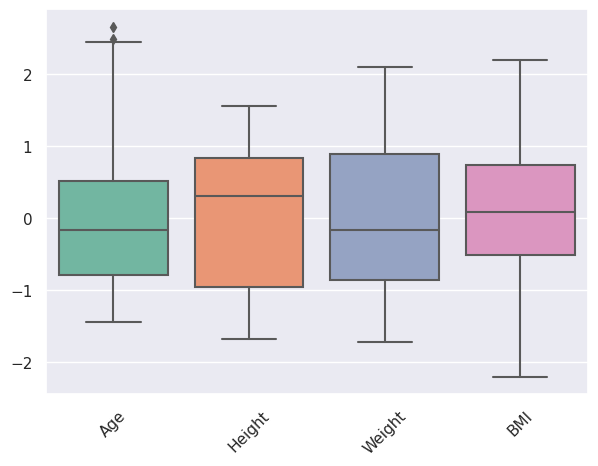

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


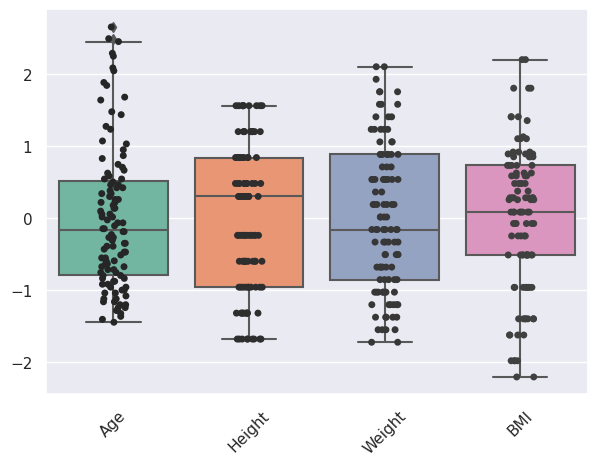

In [ ]:
# Using swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

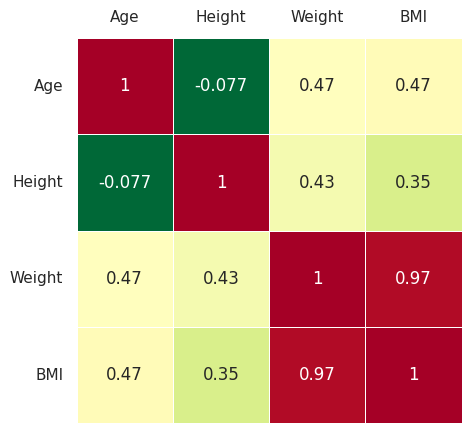

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## Principal Component Analysis

Using PCA Library

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [ ]:
out['PC']

,PC1,PC2,PC3
0,0.589480,-0.813748,-0.866090
1,-0.160099,-0.252405,-0.683875
2,1.177942,-0.694379,-0.704953
3,-0.536254,0.291580,-0.386324
4,1.976441,-0.706513,-0.539813
...,...,...,...
103,-2.873030,-1.149275,0.603737
104,-2.963797,-0.606895,0.430506
105,-2.416841,-1.024051,0.833034
106,-2.675584,-0.071279,0.352785


Scatter Plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (61.4% expl.var)', ylabel='PC2 (26.9% expl.var)'>)

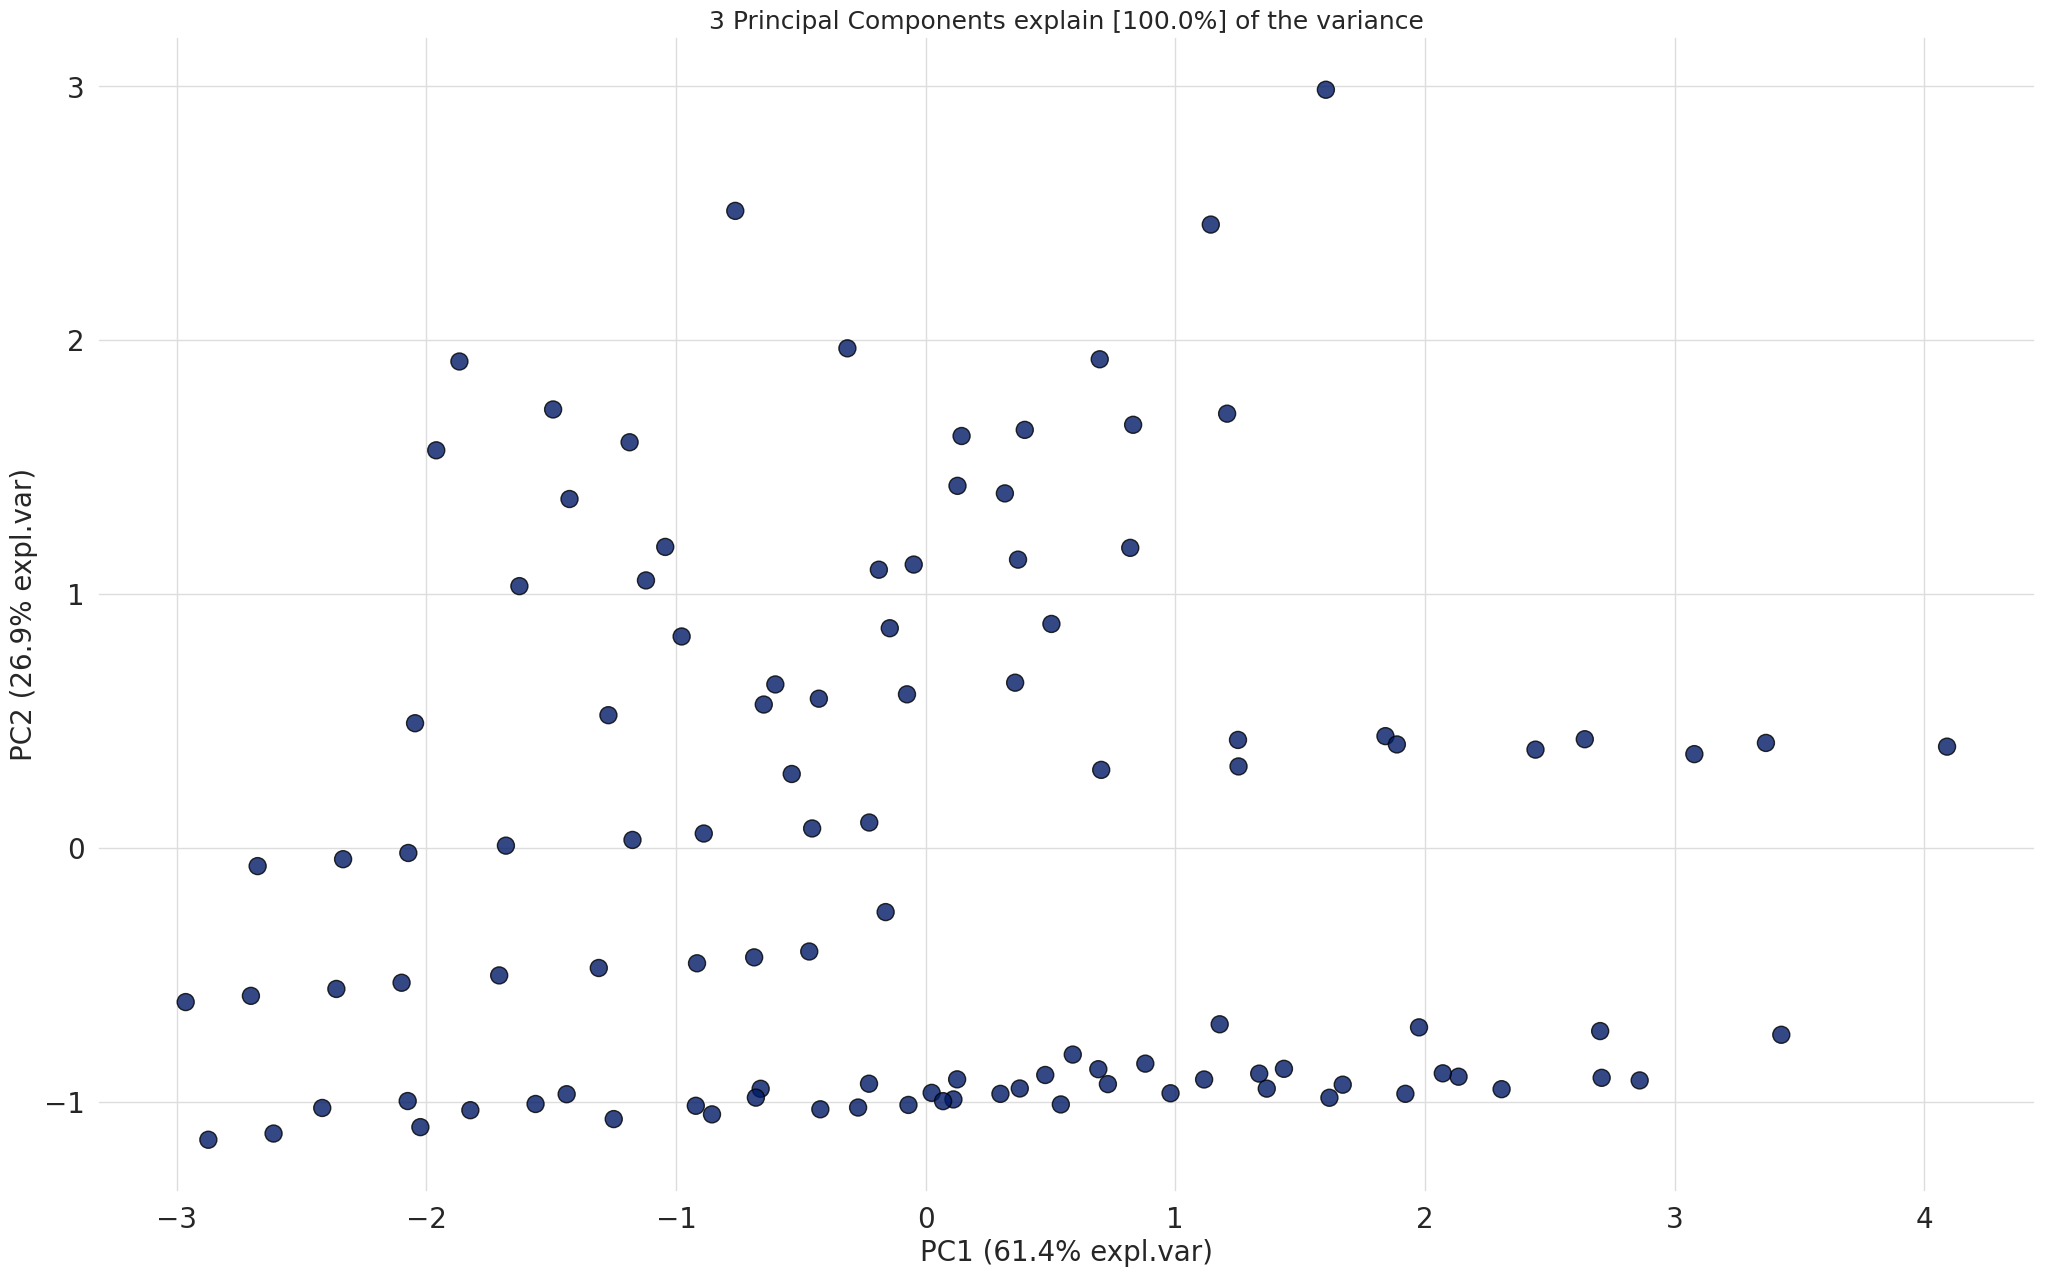

In [ ]:
model.scatter(label=True, legend=False)

Eigenvectors

In [ ]:
A = out['loadings'].T
A

NameError: ignored

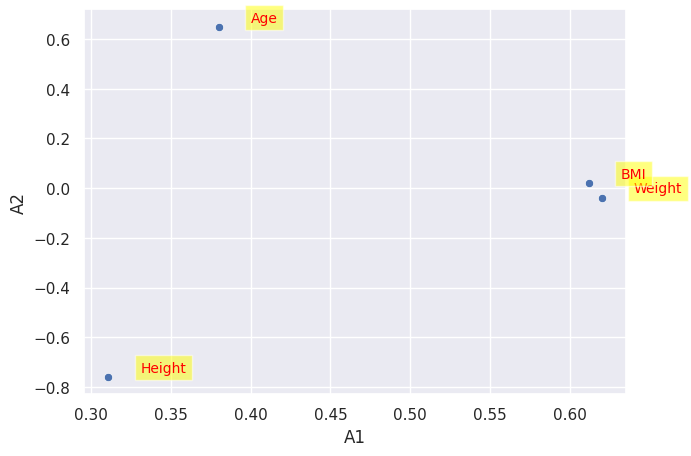

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

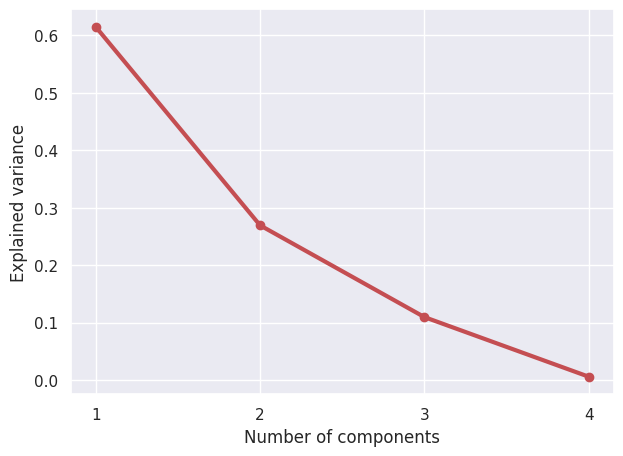

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

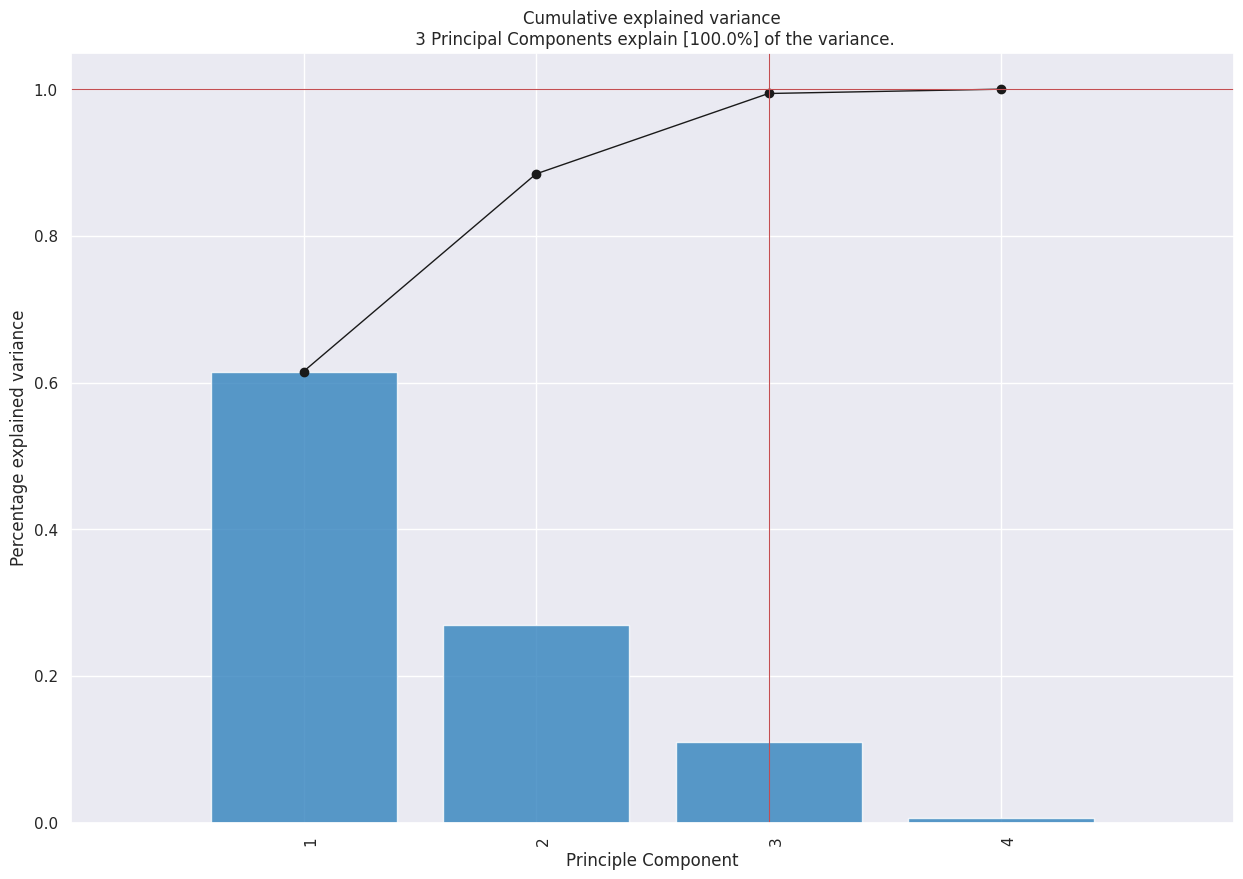

In [ ]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (61.4% expl.var)', ylabel='PC2 (26.9% expl.var)'>)

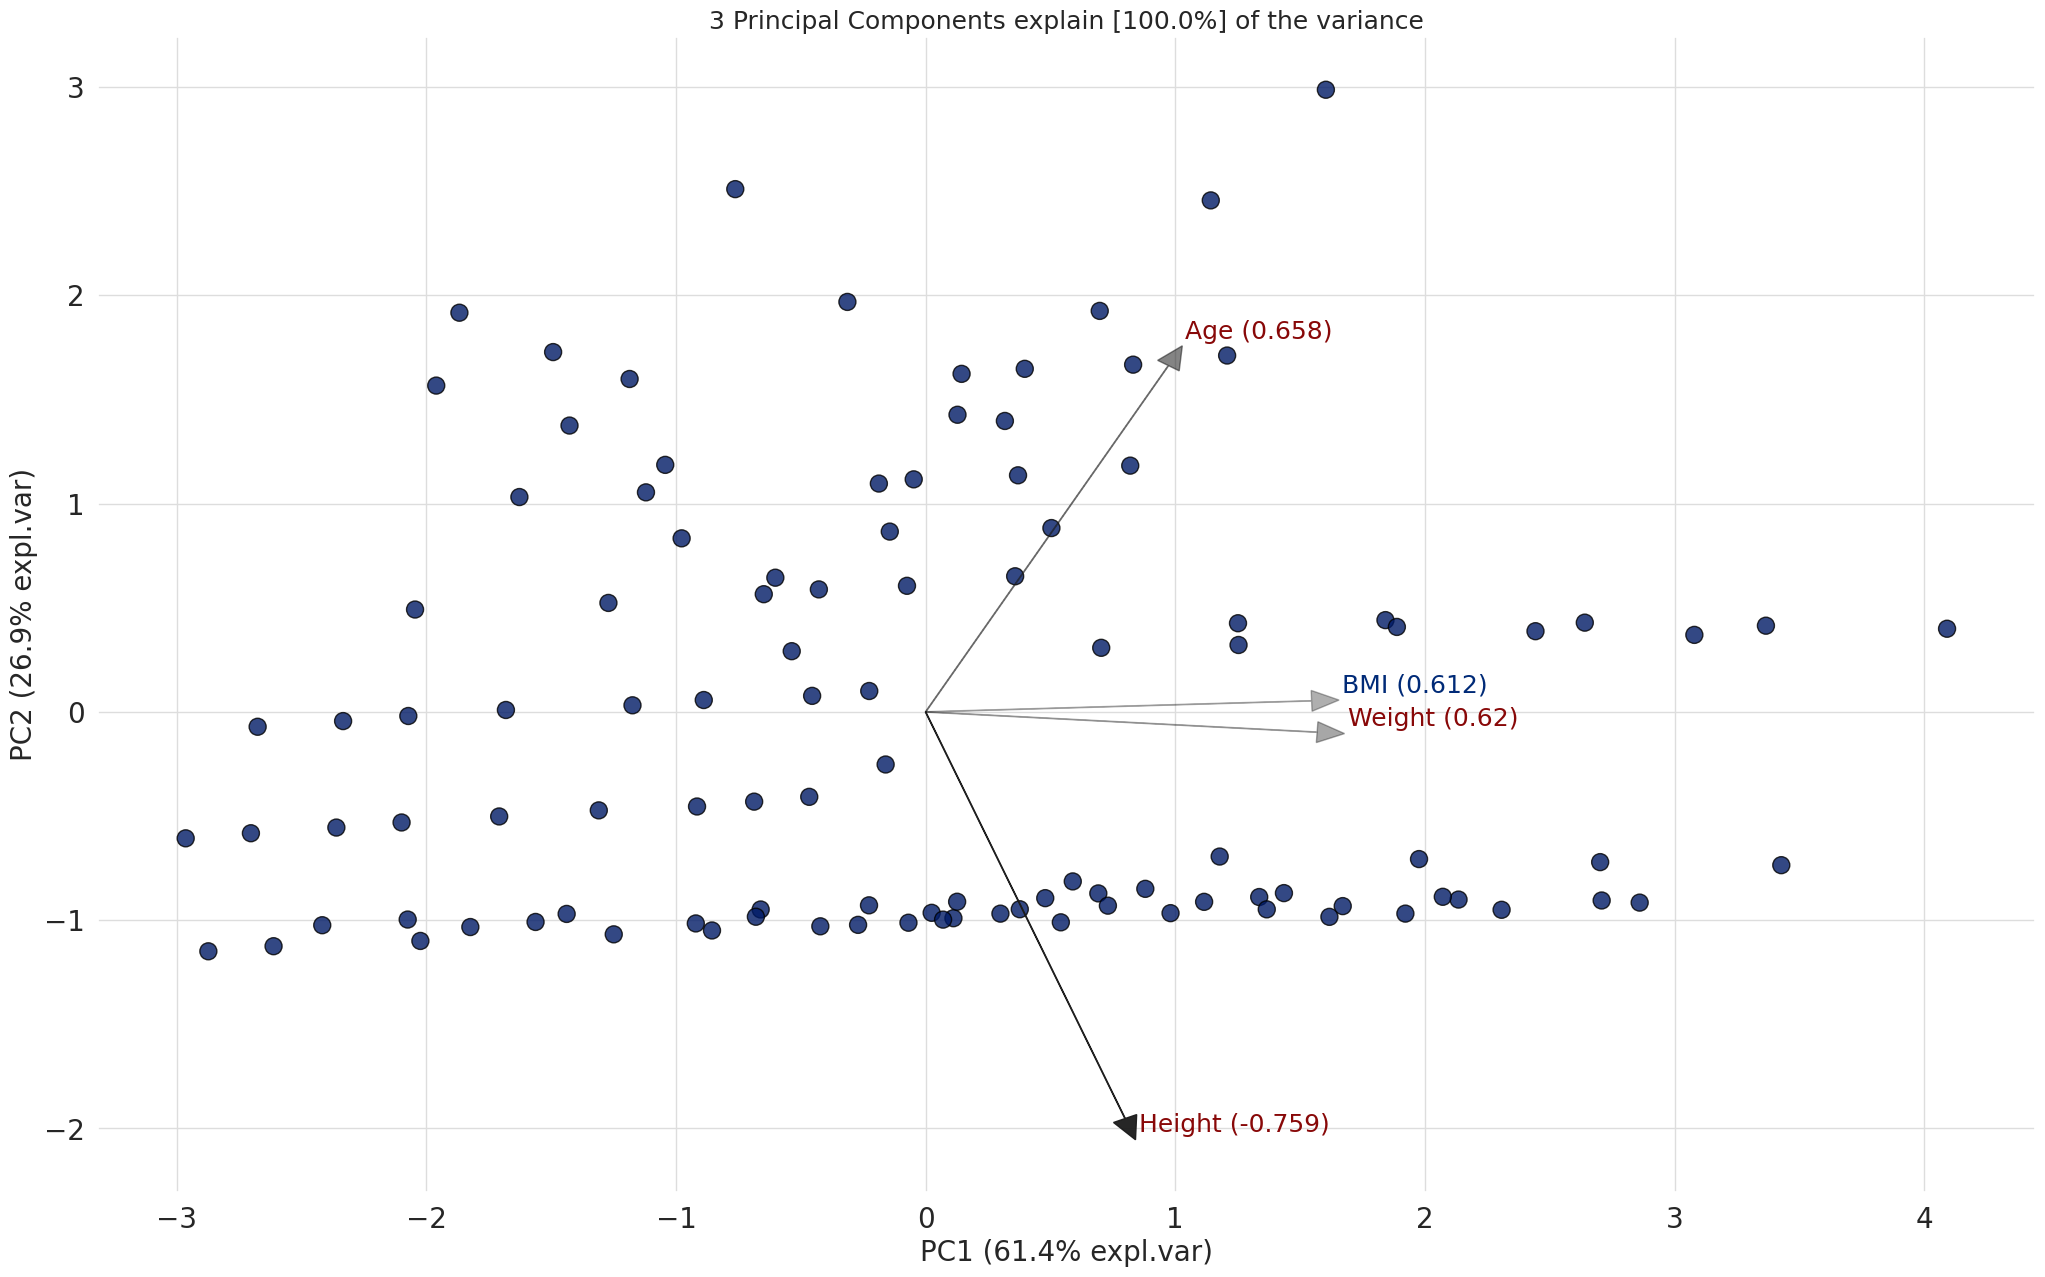

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (61.4% expl.var)', ylabel='PC2 (26.9% expl.var)', zlabel='PC3 (10.9% expl.var)'>)

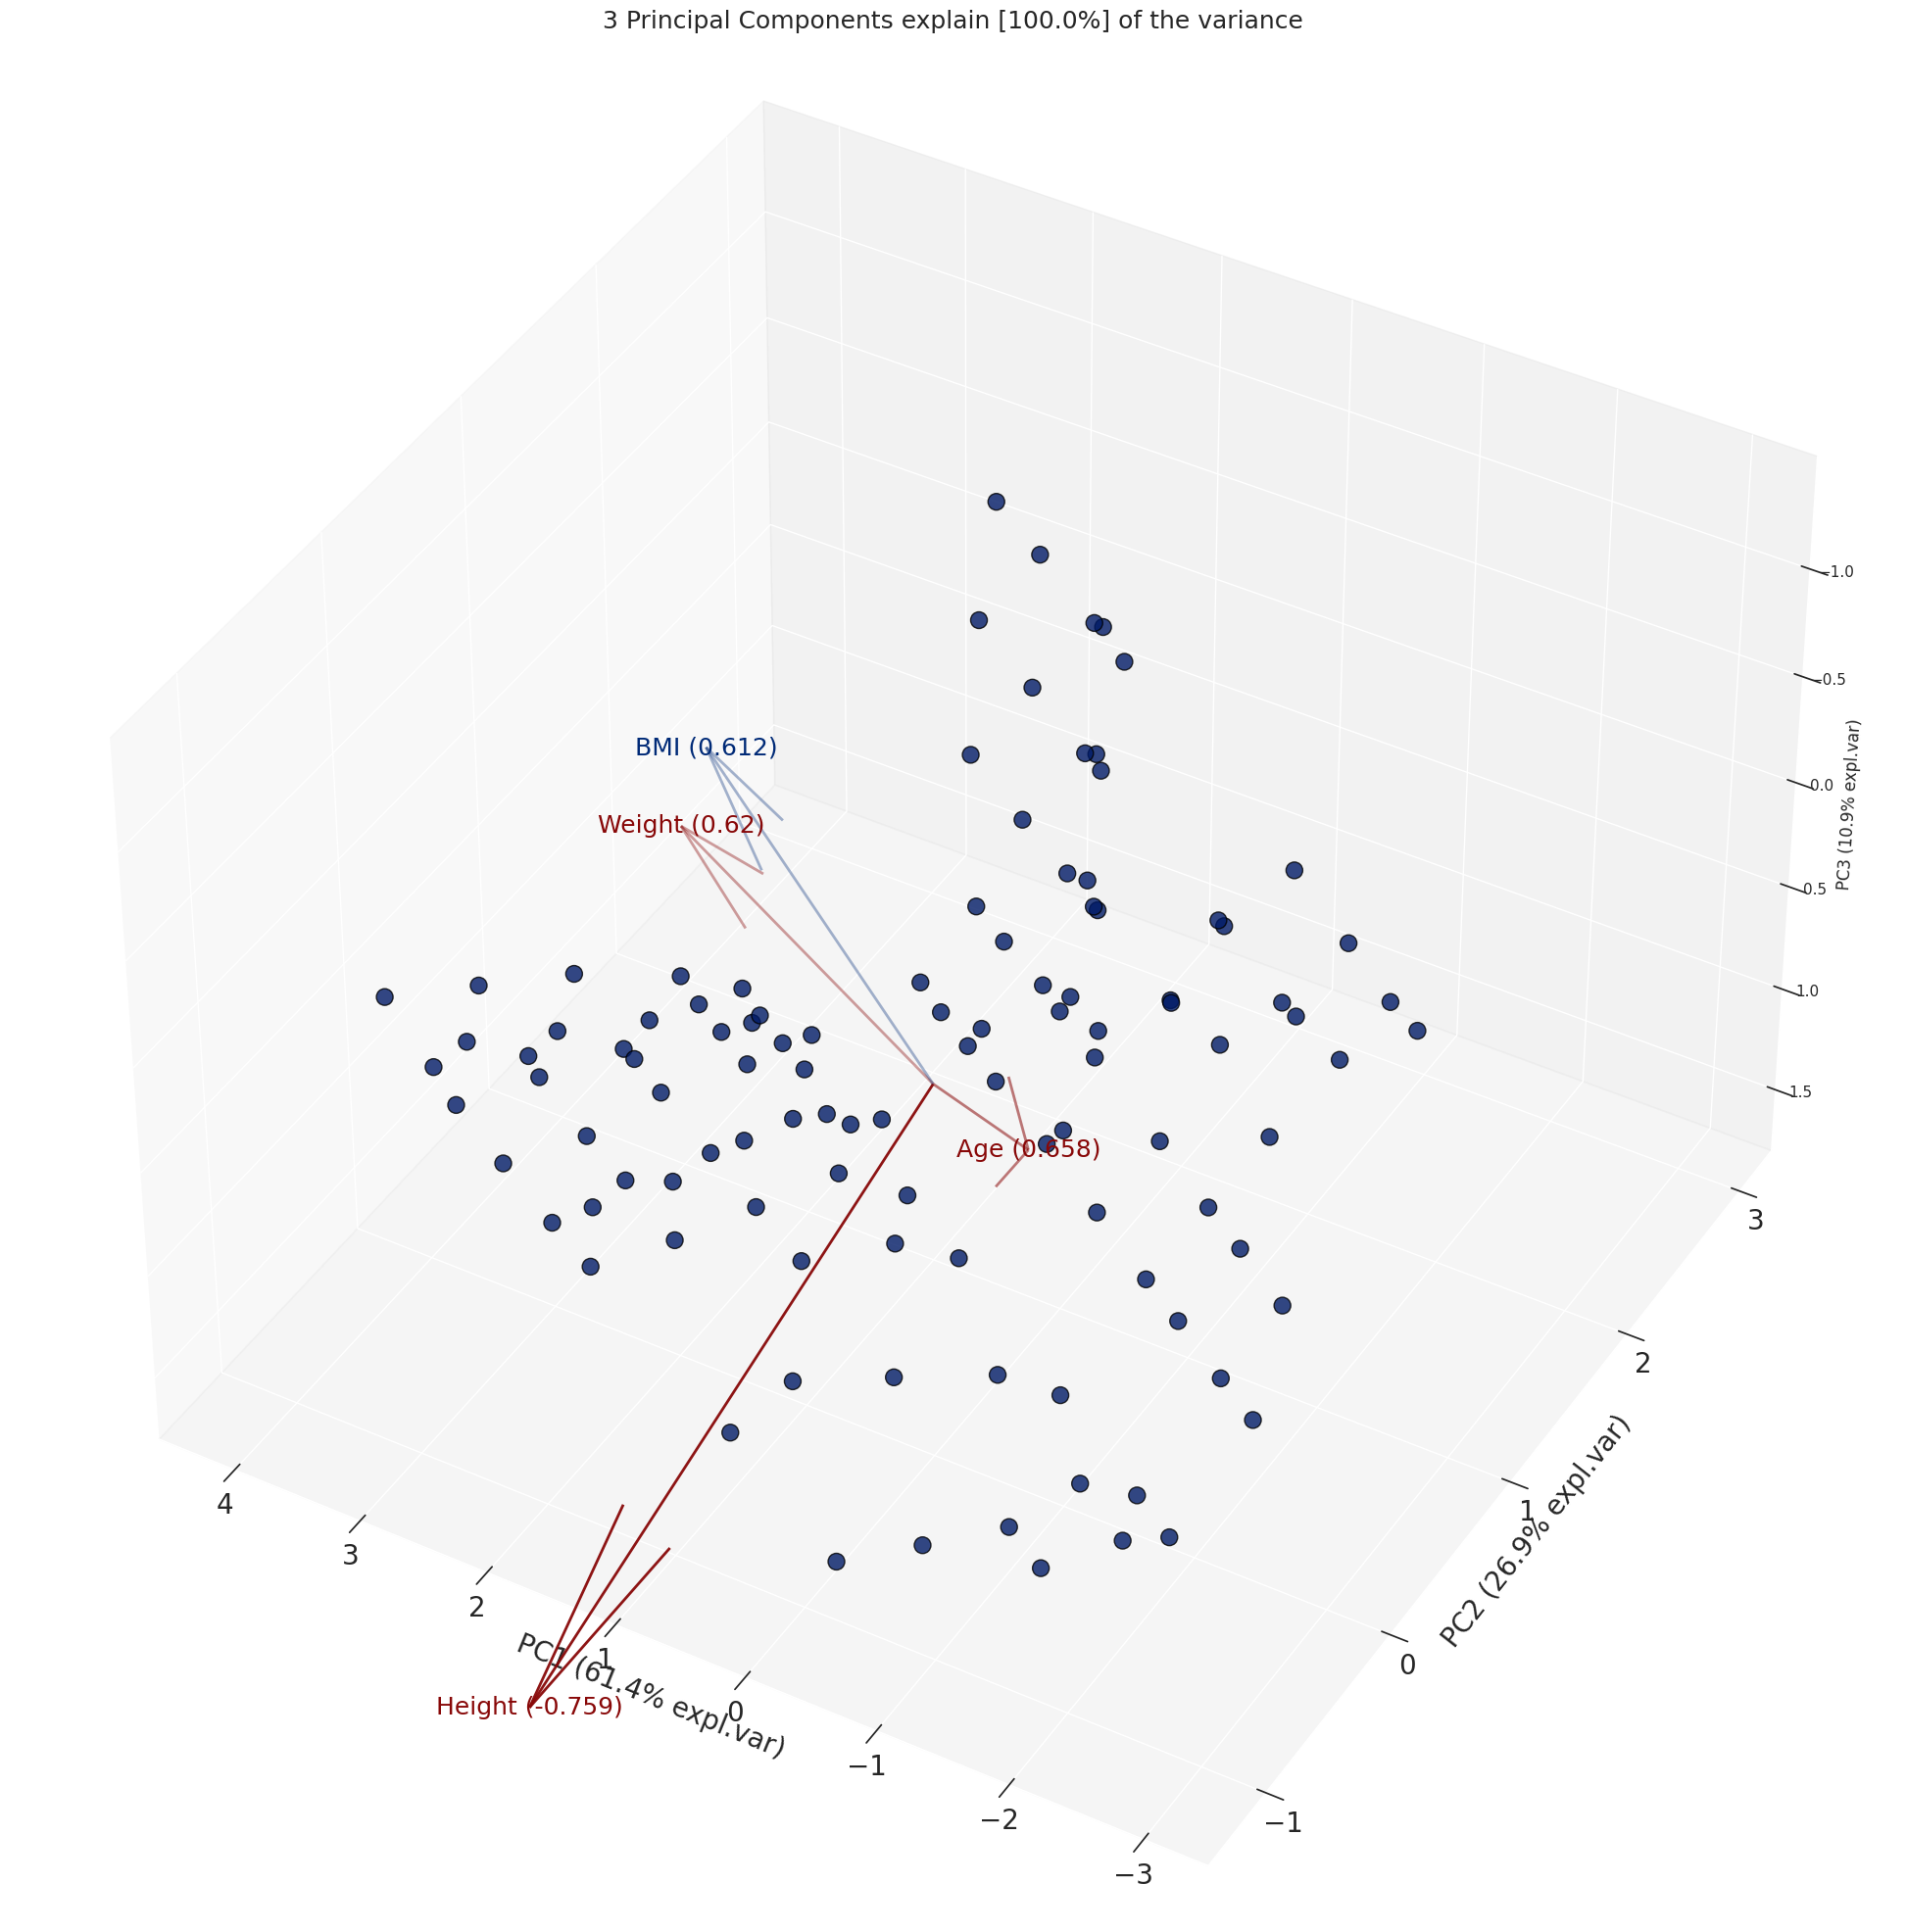

In [ ]:
model.biplot3d(legend=False)

## Classification + PCA

In [ ]:
clf_pca = setup(data=df, target='Label', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

results = pull()

print(results)

,Description,Value
0,Session id,123
1,Target,Label
2,Target type,Multiclass
3,Target mapping,"Normal Weight: 0, Obese: 1, Overweight: 2, Underweight: 3"
4,Original data shape,"(108, 5)"
5,Transformed data shape,"(108, 4)"
6,Transformed train set shape,"(75, 4)"
7,Transformed test set shape,"(33, 4)"
8,Numeric features,4
9,Preprocess,True


                    Description  \
0                    Session id   
1                        Target   
2                   Target type   
3                Target mapping   
4           Original data shape   
5        Transformed data shape   
6   Transformed train set shape   
7    Transformed test set shape   
8              Numeric features   
9                    Preprocess   
10              Imputation type   
11           Numeric imputation   
12       Categorical imputation   
13                    Normalize   
14             Normalize method   
15                          PCA   
16                   PCA method   
17               PCA components   
18               Fold Generator   
19                  Fold Number   
20                     CPU Jobs   
21                      Use GPU   
22               Log Experiment   
23              Experiment Name   
24                          USI   

                                                Value  
0                                

Comparing All Models

In [ ]:
best_model_pca = compare_models()

results = pull()

print(results)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8661,0.7742,0.8661,0.8608,0.8456,0.8002,0.8198,0.1630
qda,Quadratic Discriminant Analysis,0.8554,0.7932,0.8554,0.8745,0.8399,0.7883,0.8156,0.0430
lda,Linear Discriminant Analysis,0.8554,0.7906,0.8554,0.8832,0.8432,0.7931,0.8218,0.0740
lr,Logistic Regression,0.8411,0.7908,0.8411,0.8513,0.8226,0.7629,0.7851,0.8490
dt,Decision Tree Classifier,0.8393,0.7192,0.8393,0.8648,0.8278,0.7651,0.7865,0.0440
xgboost,Extreme Gradient Boosting,0.8393,0.7701,0.8393,0.8126,0.8088,0.7611,0.7839,0.0870
gbc,Gradient Boosting Classifier,0.8250,0.7663,0.8250,0.8214,0.8038,0.7414,0.7628,0.4390
nb,Naive Bayes,0.8161,0.7812,0.8161,0.8368,0.8036,0.7371,0.7591,0.0440
knn,K Neighbors Classifier,0.8143,0.7593,0.8143,0.8445,0.8079,0.7377,0.7619,0.0590
rf,Random Forest Classifier,0.7964,0.7790,0.7964,0.7608,0.7631,0.7025,0.7276,0.2110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.8661  0.7742  0.8661  0.8608   
qda       Quadratic Discriminant Analysis    0.8554  0.7932  0.8554  0.8745   
lda          Linear Discriminant Analysis    0.8554  0.7906  0.8554  0.8832   
lr                    Logistic Regression    0.8411  0.7908  0.8411  0.8513   
dt               Decision Tree Classifier    0.8393  0.7192  0.8393  0.8648   
xgboost         Extreme Gradient Boosting    0.8393  0.7701  0.8393  0.8126   
gbc          Gradient Boosting Classifier    0.8250  0.7663  0.8250  0.8214   
nb                            Naive Bayes    0.8161  0.7812  0.8161  0.8368   
knn                K Neighbors Classifier    0.8143  0.7593  0.8143  0.8445   
rf               Random Forest Classifier    0.7964  0.7790  0.7964  0.7608   
svm                   SVM - Linear Kernel    0.7893  0.0000  0.7893  0.7313   
et                 Extra Trees Classifier    0.7839 

Best model with PCA

In [ ]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
tuned_best_model_pca = tune_model(best_model_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6250,0.0000,0.6250,0.5250,0.5694,0.3684,0.3796
2,0.6250,0.0000,0.6250,0.5000,0.5417,0.4000,0.4472
3,0.8750,0.9375,0.8750,0.9167,0.8667,0.8261,0.8447
4,0.7500,0.9405,0.7500,0.6562,0.6964,0.6364,0.6528
5,0.8571,0.9762,0.8571,0.9286,0.8571,0.8000,0.8235
6,0.8571,1.0000,0.8571,0.9048,0.8571,0.8000,0.8235
7,0.7143,0.9286,0.7143,0.7857,0.7143,0.6000,0.6176
8,0.7143,0.9762,0.7143,0.6190,0.6571,0.5758,0.5949


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.6250  0.0000  0.6250  0.5250  0.5694  0.3684  0.3796
2       0.6250  0.0000  0.6250  0.5000  0.5417  0.4000  0.4472
3       0.8750  0.9375  0.8750  0.9167  0.8667  0.8261  0.8447
4       0.7500  0.9405  0.7500  0.6562  0.6964  0.6364  0.6528
5       0.8571  0.9762  0.8571  0.9286  0.8571  0.8000  0.8235
6       0.8571  1.0000  0.8571  0.9048  0.8571  0.8000  0.8235
7       0.7143  0.9286  0.7143  0.7857  0.7143  0.6000  0.6176
8       0.7143  0.9762  0.7143  0.6190  0.6571  0.5758  0.5949
9       0.8571  0.9190  0.8571  0.7619  0.8000  0.7879  0.8141
Mean    0.7875  0.7678  0.7875  0.7598  0.7560  0.6795  0.6998
Std     0.1150  0.3848  0.1150  

Evaluate Best Model

In [ ]:
evaluate_model(tuned_best_model_pca)

results = pull()

print(results)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.6250  0.0000  0.6250  0.5250  0.5694  0.3684  0.3796
2       0.6250  0.0000  0.6250  0.5000  0.5417  0.4000  0.4472
3       0.8750  0.9375  0.8750  0.9167  0.8667  0.8261  0.8447
4       0.7500  0.9405  0.7500  0.6562  0.6964  0.6364  0.6528
5       0.8571  0.9762  0.8571  0.9286  0.8571  0.8000  0.8235
6       0.8571  1.0000  0.8571  0.9048  0.8571  0.8000  0.8235
7       0.7143  0.9286  0.7143  0.7857  0.7143  0.6000  0.6176
8       0.7143  0.9762  0.7143  0.6190  0.6571  0.5758  0.5949
9       0.8571  0.9190  0.8571  0.7619  0.8000  0.7879  0.8141
Mean    0.7875  0.7678  0.7875  0.7598  0.7560  0.6795  0.6998
Std     0.1150  0.3848  0.1150  0.1690  0.1378  0.1894  0.1847


# Random Forest Classifier Model

In [ ]:
rf_pca = create_model('rf')

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8750,0.0000,0.8750,0.9000,0.8611,0.7895,0.8135
2,0.7500,0.0000,0.7500,0.8750,0.7619,0.6190,0.6669
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6250,0.9167,0.6250,0.5000,0.5417,0.4667,0.5023
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.5714,0.9357,0.5714,0.5000,0.5238,0.3824,0.3941
7,0.5714,0.9524,0.5714,0.5000,0.5238,0.4167,0.4548
8,0.7143,0.9857,0.7143,0.5714,0.6190,0.5625,0.6301


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8750  0.0000  0.8750  0.9000  0.8611  0.7895  0.8135
2       0.7500  0.0000  0.7500  0.8750  0.7619  0.6190  0.6669
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.6250  0.9167  0.6250  0.5000  0.5417  0.4667  0.5023
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.5714  0.9357  0.5714  0.5000  0.5238  0.3824  0.3941
7       0.5714  0.9524  0.5714  0.5000  0.5238  0.4167  0.4548
8       0.7143  0.9857  0.7143  0.5714  0.6190  0.5625  0.6301
9       0.8571  1.0000  0.8571  0.7619  0.8000  0.7879  0.8141
Mean    0.7964  0.7790  0.7964  0.7608  0.7631  0.7025  0.7276
Std     0.1654  0.3906  0.1654  0.2107  0.1907  0.2338  0.2207


Tuning Random Forest Classifier Model

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8750,0.0000,0.8750,0.9167,0.8667,0.8000,0.8208
2,0.7500,0.0000,0.7500,0.8750,0.7619,0.6190,0.6669
3,0.8750,0.9583,0.8750,0.9167,0.8667,0.8261,0.8447
4,0.7500,0.9792,0.7500,0.6667,0.7000,0.6444,0.6598
5,0.8571,0.9714,0.8571,0.9048,0.8571,0.8000,0.8235
6,0.7143,0.9071,0.7143,0.7143,0.7143,0.5882,0.5882
7,0.7143,0.9286,0.7143,0.7857,0.7143,0.6000,0.6176
8,0.7143,0.9452,0.7143,0.7857,0.7238,0.6111,0.6288


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8750  0.0000  0.8750  0.9167  0.8667  0.8000  0.8208
2       0.7500  0.0000  0.7500  0.8750  0.7619  0.6190  0.6669
3       0.8750  0.9583  0.8750  0.9167  0.8667  0.8261  0.8447
4       0.7500  0.9792  0.7500  0.6667  0.7000  0.6444  0.6598
5       0.8571  0.9714  0.8571  0.9048  0.8571  0.8000  0.8235
6       0.7143  0.9071  0.7143  0.7143  0.7143  0.5882  0.5882
7       0.7143  0.9286  0.7143  0.7857  0.7143  0.6000  0.6176
8       0.7143  0.9452  0.7143  0.7857  0.7238  0.6111  0.6288
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8250  0.7690  0.8250  0.8565  0.8205  0.7489  0.7650
Std     0.1074  0.3855  0.1074  0.1083  0.1095  0.1523  0.1468


Evaluating tuned random forest classifier model

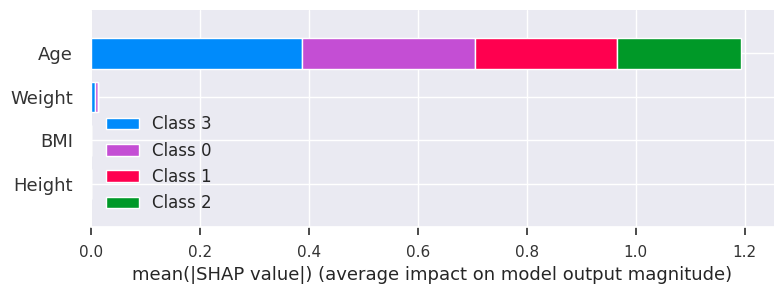

In [ ]:
explainer = shap.TreeExplainer(tuned_rf_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

# Extra Trees Classifier Model

In [ ]:
et_pca = create_model('et')

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,1.0000,0.8750,0.9000,0.8611,0.8000,0.8230
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7500,0.0000,0.7500,0.8750,0.7619,0.6190,0.6669
3,0.8750,0.9792,0.8750,0.9062,0.8631,0.8222,0.8418
4,0.6250,0.9167,0.6250,0.5312,0.5714,0.4545,0.4663
5,0.8571,1.0000,0.8571,0.9286,0.8571,0.8000,0.8235
6,0.7143,0.9357,0.7143,0.7143,0.7143,0.5882,0.5882
7,0.5714,0.9286,0.5714,0.3929,0.4626,0.3824,0.4213
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8750  1.0000  0.8750  0.9000  0.8611  0.8000  0.8230
1       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.7500  0.0000  0.7500  0.8750  0.7619  0.6190  0.6669
3       0.8750  0.9792  0.8750  0.9062  0.8631  0.8222  0.8418
4       0.6250  0.9167  0.6250  0.5312  0.5714  0.4545  0.4663
5       0.8571  1.0000  0.8571  0.9286  0.8571  0.8000  0.8235
6       0.7143  0.9357  0.7143  0.7143  0.7143  0.5882  0.5882
7       0.5714  0.9286  0.5714  0.3929  0.4626  0.3824  0.4213
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.5714  0.8905  0.5714  0.6667  0.6000  0.4000  0.4118
Mean    0.7839  0.7651  0.7839  0.7915  0.7692  0.6866  0.7043
Std     0.1539  0.3843  0.1539  0.1964  0.1722  0.2199  0.2143


Tuning Extra Trees Classifier Model

In [ ]:
tuned_et_pca = tune_model(et_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8750,0.0000,0.8750,0.9167,0.8667,0.8000,0.8208
2,0.7500,0.0000,0.7500,0.8750,0.7619,0.6190,0.6669
3,1.0000,0.9583,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8750,1.0000,0.8750,0.9167,0.8667,0.8261,0.8447
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8571,0.9357,0.8571,0.9048,0.8571,0.8000,0.8235
7,0.7143,0.9762,0.7143,0.7857,0.7143,0.6000,0.6176
8,0.8571,0.9714,0.8571,0.9286,0.8571,0.8000,0.8235


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


The least populated class in y has only 8 members, which is less than n_splits=10.


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8750  0.0000  0.8750  0.9167  0.8667  0.8000  0.8208
2       0.7500  0.0000  0.7500  0.8750  0.7619  0.6190  0.6669
3       1.0000  0.9583  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8750  1.0000  0.8750  0.9167  0.8667  0.8261  0.8447
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8571  0.9357  0.8571  0.9048  0.8571  0.8000  0.8235
7       0.7143  0.9762  0.7143  0.7857  0.7143  0.6000  0.6176
8       0.8571  0.9714  0.8571  0.9286  0.8571  0.8000  0.8235
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8929  0.7842  0.8929  0.9327  0.8924  0.8445  0.8597
Std     0.1007  0.3926  0.1007  0.0666  0.0994  0.1462  0.1337


Evaluating tuned extra trees classifier model

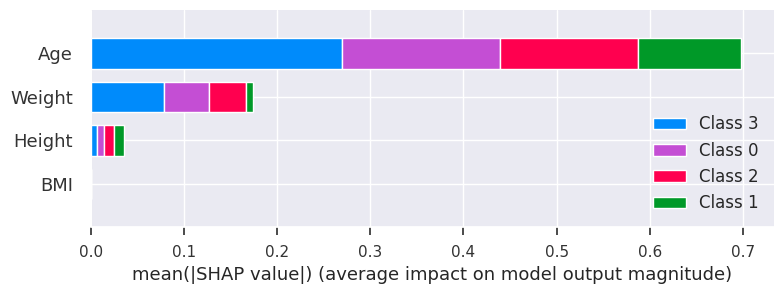

In [ ]:
explainer = shap.TreeExplainer(tuned_et_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

# Logistic Regression Model

In [ ]:
lr_pca = create_model('lr')

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,1.0000,0.8750,0.9000,0.8611,0.8000,0.8230
1,0.7500,0.0000,0.7500,0.7500,0.7500,0.6000,0.6000
2,0.7500,0.0000,0.7500,0.8750,0.7619,0.6190,0.6669
3,0.8750,0.9792,0.8750,0.9167,0.8667,0.8261,0.8447
4,0.8750,1.0000,0.8750,0.9167,0.8667,0.8261,0.8447
5,0.8571,0.9762,0.8571,0.7619,0.8000,0.7879,0.8141
6,0.8571,0.9762,0.8571,0.7857,0.8095,0.7941,0.8186
7,0.7143,0.9762,0.7143,0.6786,0.6531,0.5758,0.6158
8,0.8571,1.0000,0.8571,0.9286,0.8571,0.8000,0.8235


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8750  1.0000  0.8750  0.9000  0.8611  0.8000  0.8230
1       0.7500  0.0000  0.7500  0.7500  0.7500  0.6000  0.6000
2       0.7500  0.0000  0.7500  0.8750  0.7619  0.6190  0.6669
3       0.8750  0.9792  0.8750  0.9167  0.8667  0.8261  0.8447
4       0.8750  1.0000  0.8750  0.9167  0.8667  0.8261  0.8447
5       0.8571  0.9762  0.8571  0.7619  0.8000  0.7879  0.8141
6       0.8571  0.9762  0.8571  0.7857  0.8095  0.7941  0.8186
7       0.7143  0.9762  0.7143  0.6786  0.6531  0.5758  0.6158
8       0.8571  1.0000  0.8571  0.9286  0.8571  0.8000  0.8235
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8411  0.7908  0.8411  0.8513  0.8226  0.7629  0.7851
Std     0.0788  0.3955  0.0788  0.0959  0.0874  0.1228  0.1162


Tuning Logistic Regression Model

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8750,0.0000,0.8750,0.9167,0.8667,0.8000,0.8208
2,0.7500,0.0000,0.7500,0.8750,0.7619,0.6190,0.6669
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8750,0.9792,0.8750,0.9167,0.8667,0.8261,0.8447
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8571,0.9762,0.8571,0.9048,0.8571,0.8000,0.8235
7,0.7143,0.9762,0.7143,0.6786,0.6531,0.5758,0.6158
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


The least populated class in y has only 8 members, which is less than n_splits=10.


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8750  0.0000  0.8750  0.9167  0.8667  0.8000  0.8208
2       0.7500  0.0000  0.7500  0.8750  0.7619  0.6190  0.6669
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8750  0.9792  0.8750  0.9167  0.8667  0.8261  0.8447
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8571  0.9762  0.8571  0.9048  0.8571  0.8000  0.8235
7       0.7143  0.9762  0.7143  0.6786  0.6531  0.5758  0.6158
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9071  0.7932  0.9071  0.9292  0.9005  0.8621  0.8772
Std     0.1047  0.3967  0.1047  0.0958  0.1158  0.1566  0.1397


Evaluating tuned logistic regression model

In [ ]:
explainer = shap.KernelExplainer(tuned_lr_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

NameError: ignored